<a href="https://colab.research.google.com/github/juandarango/Machine_Learning_Vorlesung/blob/main/DS-ML-PL_Fallstudie_2b_Lösungsvorschlag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Im Colab öffnen"/></a>

# Fallstudie 2b: Orientierung von Äpfeln (GPU nicht vergessen!)

## Regression von der Rotation

## Ziel: Lageerkennung

Die Lageerkennung ist eine Herausforderung für die Deep-Learning Bildverarbeitung, denn um die Drehung eines Objektes im Raum erkennen zu können, benötigt man eine Datenbank mit allen möglichen Drehungen. Da es unendlich viele verschiedene Blickwinkel gibt, besteht der erste Schritt zur Erstellung der Datenbank darin, die Rotationen zu diskretisieren und die möglichen Redundanzen aufgrund der Symmetrie der Äpfel zu analysieren. Da das manuelle Drehen der Äpfel umständlich und ungenau ist, wurde eine Konstruktion mit Schrittmotor geschaffen, welche die Äpfel drehen und die benötigten Informationen entsprechend der Drehung erfassen kann. Sobald eine Umdrehung bezogen auf eine Achse vollendet ist, wird das Objekt erneut manuell eingespannt, damit nun um zweite Achse rotiert und der Prozess erneut gestartet werden kann.


## Wie kann einen Winkel vorhergesagt werden?

Ein Winkel ist ein kontinuierlicher Wert.

### Klassifikation:
    Es wäre möglich Winkeln in klassen zu verteilen. zB: 
    x=10, 20, 30 ...
    y=10, 20, 30 …
    und jede mögliche kombinationen von x und y. 
    
   <font color='orange'>Nachteile:</font>
   * Zu viele Klassen.
   * Nur diskrete werte wurden auch vorhergesagt

### Regression: 

Alle Werte können vorhergesagt werden. NN haben als Output kontinuierliche Werte, die durch eine Softmax-Funktion in Klassen verteilt werden. In diesem Fall wird dieser Schritt ausfallen. 


## Was soll Input und Output sein?
### Input: Bild mit einem Apfel

Die Bilder wurden semi-automatisch erzeugt. 
 - Schrittmotor + künztliche rotation

<img src="Photos/stepper.png" style="width:300px">

### Daten: 
 - wie sind die Daten gespeichert?
 - wie sehen die Bildern aus?
 

<img src="Photos/xrot.png" style="width:500px">

In [1]:
# Fastai in colab installieren (mit version Angabe)
!pip install -Uqq torch==1.6.0
!pip install -Uqq torchvision==0.7.0
!pip install -Uqq fastcore==1.1.0
!pip install -Uqq fastai==2.0.16
# Fehler Meldungen ignorieren!

In [2]:
from fastai.vision.all import *

In [3]:
#Datensatz in Colab montieren
url_photos = 'https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Reg_Z.tgz'
path_apples = untar_data(url_photos)
path_apples = path_apples/'Apples_Vorlesung_Z_00'
path_apples.ls().sorted()

(#24) [Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_01'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_01seg'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_02'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_02seg'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_03'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_03seg'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_04'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_04seg'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_05'),Path('/home/ara/.fastai/data/Apples_Reg_Z/Apples_Vorlesung_Z_00/Apple_05seg')...]

Es gibt 24 Verzeichnisse mit Äppfeln, jetzt sehen wir den Inhalt

In [4]:
path_apples_4 = path_apples/'Apple_04'
apple_4_files = path_apples_4.ls(file_exts='.png').sorted()
for apple in apple_4_files:
    print(apple.name)

0000_X_000_Z_00.png
0018_X_180_Z_00.png
0289_X_010_Z_00.png
0290_X_020_Z_00.png
0291_X_030_Z_00.png
0292_X_040_Z_00.png
0293_X_050_Z_00.png
0294_X_060_Z_00.png
0295_X_070_Z_00.png
0296_X_080_Z_00.png
0297_X_090_Z_00.png
0298_X_100_Z_00.png
0299_X_110_Z_00.png
0300_X_120_Z_00.png
0301_X_130_Z_00.png
0302_X_140_Z_00.png
0303_X_150_Z_00.png
0304_X_160_Z_00.png
0305_X_170_Z_00.png
0307_X_190_Z_00.png
0308_X_200_Z_00.png
0309_X_210_Z_00.png
0310_X_220_Z_00.png
0311_X_230_Z_00.png
0312_X_240_Z_00.png
0313_X_250_Z_00.png
0314_X_260_Z_00.png
0315_X_270_Z_00.png
0316_X_280_Z_00.png
0317_X_290_Z_00.png
0318_X_300_Z_00.png
0319_X_310_Z_00.png
0320_X_320_Z_00.png
0321_X_330_Z_00.png
0322_X_340_Z_00.png
0323_X_350_Z_00.png


Es ist eine gut Idee einige Bilder zu ploten

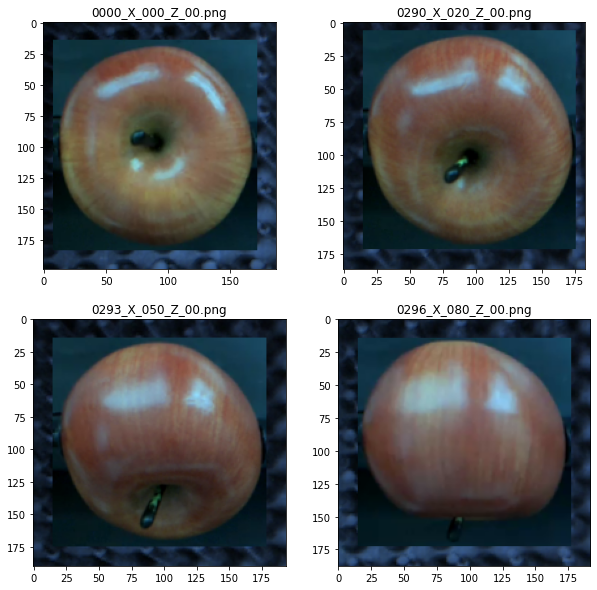

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# select some images to show
apple1 = apple_4_files[0]
apple2 = apple_4_files[3]
apple3 = apple_4_files[6]
apple4 = apple_4_files[9]

fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
im = Image.open(apple1)
plt.imshow(im)
plt.title(apple1.name)

plt.subplot(2, 2, 2)
im = Image.open(apple2)
plt.imshow(im)
plt.title(apple2.name)

plt.subplot(2, 2, 3)
im = Image.open(apple3)
plt.imshow(im)
plt.title(apple3.name)

plt.subplot(2, 2, 4)
im = Image.open(apple4)
plt.imshow(im)
plt.title(apple4.name)

plt.show()

### Output: Winkel in X

Ein Apfel ist normalerweise in einer Achse symmetrisch, weswegen nur 2 Achsen gebraucht werden.

Diese Informationen sind im Namen des Bildes gespeichert:

zum Beispiel: 0005_X_055_Z_05.png

- Bildnummer = 0005
- Winkel in X = 55°
- Winkel in Z = 5°

Mit 'Regular Expression operations' kann man diese Information herausfinden. In diesem Fall auch aus der Name, wenn wir ein String als Liste betrachten.

Für diese Fallstudie wurde das Problem vereinfacht und nur X wird vorhergesagt. 

In [6]:
file_name = apple2.name
file_name

'0290_X_020_Z_00.png'

In [64]:
# Beispiel RegEx für X und Z
xz_reg = re.compile(r'X_(-?\d+)_Z_(-?\d+).png$')
x=float(xz_reg.search(str(file_name)).group(1))
z=float(xz_reg.search(str(file_name)).group(2))

x

20.0

In [63]:
# Beispiel mit String Info.
float(file_name[7:10])

20.0

In [65]:
def simple_get_y(file_name):
    '''return only X as float from the file_name'''
    xz_reg = re.compile(r'X_(-?\d+)_Z_(-?\d+).png$')
    x=float(xz_reg.search(str(file_name)).group(1))
    # z=float(xz_reg.search(str(file_name)).group(2))
    return x

simple_get_y(file_name)


20.0

Trotzdem haben Winkeln in Grad große Nachteile für das Trainieren von CNN. 

- 0° = 360°
- kardanische Blockade (Gimbal Lock): In diesem Zustand liegen zwei der möglichen drei Drehachsen parallel zueinander und das System hat dadurch einen Freiheitsgrad weniger.(s. https://www.youtube.com/watch?v=kHFwysRM2ps). Deswegen werden oft Quaternionen benutzt. 

In diesem Fall wird einfach eine Loss benutzt, wobei 360° und 0° gleich sind.

## Erstellung vom DataBlock

An sich ist ein DataBlock in Fastai nur eine Vorlage, um die Daten zusammenzustellen. 

An sich ist ein DataBlock in Fastai nur eine Vorlage, um die Daten zusammenzustellen. 

Normalerweise wird der DataBlock aufgebaut, indem die Folgende Fragen beantwortet werden:

- Datentyp von Inputs und Outputs? Hier Bilder und Nummern
- Wo befinden sich die Daten? Hier im Dateinamen in Unterordnern
- Muss etwas auf die Inputs angewendet werden? Hier nein
- Muss etwas auf die Outputs angewandt werden? Hier die Funktion get_y
- Wie werden die Daten aufgeteilt? Hier zufällig
- Müssen wir etwas auf geformte Elemente anwenden? Hier eine Größenänderung (Resize)
- Müssen wir etwas auf batch_transformations anwenden? Hier nichts

Damit kann ein Dataloader erstellt werden. Dieser erhält die Trainings- und Validationsdatensätze, um die CNN zu trainieren!

In [66]:
path = path_apples
dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.2,seed=77),
                   get_items = get_image_files,
                   get_y = simple_get_y,#nur z
                   item_tfms = Resize(190),
                  )

dls = dblock.dataloaders(path)

In [67]:
#check the valid and training dataset
dls.valid_ds,dls.train_ds

((#172) [(PILImage mode=RGB size=190x190, tensor(40.)),(PILImage mode=RGB size=190x190, tensor(230.)),(PILImage mode=RGB size=190x190, tensor(120.)),(PILImage mode=RGB size=257x258, tensor(220.)),(PILImage mode=RGB size=190x190, tensor(215.)),(PILImage mode=RGB size=190x190, tensor(280.)),(PILImage mode=RGB size=190x190, tensor(140.)),(PILImage mode=RGB size=190x190, tensor(0.)),(PILImage mode=RGB size=190x190, tensor(20.)),(PILImage mode=RGB size=261x255, tensor(180.))...],
 (#692) [(PILImage mode=RGB size=190x190, tensor(225.)),(PILImage mode=RGB size=245x280, tensor(295.)),(PILImage mode=RGB size=263x270, tensor(270.)),(PILImage mode=RGB size=190x190, tensor(110.)),(PILImage mode=RGB size=190x190, tensor(330.)),(PILImage mode=RGB size=190x190, tensor(0.)),(PILImage mode=RGB size=190x190, tensor(335.)),(PILImage mode=RGB size=190x190, tensor(350.)),(PILImage mode=RGB size=195x203, tensor(340.)),(PILImage mode=RGB size=190x190, tensor(270.))...])

tensor(225.)


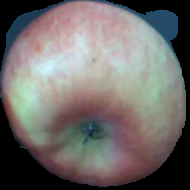

In [70]:
print(dls.train_ds[0][1])
dls.train_ds[0][0]

mit show_batch können wir die Bilder und Labeln sehen, mit dem wir die CNN trainieren 

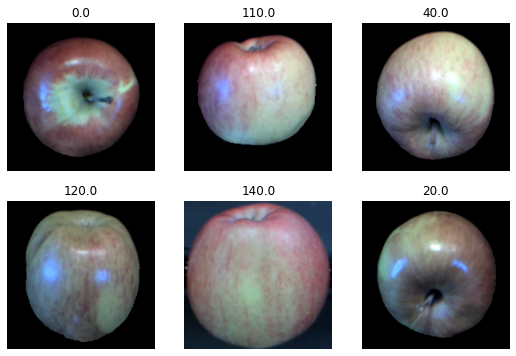

In [13]:
dls.show_batch(max_n=6)

## Fehler Funktion

Was sieht eine 'Standard Fehlerfunktion' aus?

In [14]:
mse
MSELossFlat??
nn.MSELoss??
F.mse_loss??

Wie soll in diesem Fall ein Fehlerfunktion aufgebaut werden, damit 360°-0° gleich null ist. 

In [71]:
def mean_square_sin_error(inp,targ): 
    '''mean absolute from the sin of the error/2'''
    inp,targ = flatten_check(inp,targ)
    return torch.square(torch.sin((inp-targ)/2*np.pi/180)).mean()


In [72]:
def mean_absolute_sin_error(inp,targ): 
    '''mean absolute from the sin of the error/2'''
    inp,targ = flatten_check(inp,targ)
    return torch.abs(torch.sin((inp-targ)/2*np.pi/180)).mean()

In [76]:
p1,p2=tensor(0.),tensor(360.)

mae(p1,p2)*np.pi/180 #in rad

tensor(6.2832)

In [74]:
mean_absolute_sin_error(p1,p2)

tensor(8.7423e-08)

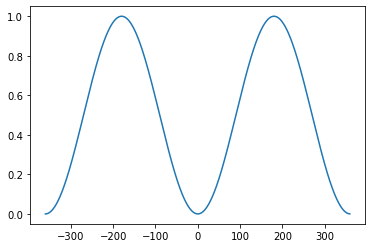

In [19]:
angle_diff = np.arange(-360,360)
y = np.square(np.sin((angle_diff)/2*np.pi/180))
plt.plot(angle_diff,y)

In [20]:
# Diese modifizierte 'mean absolute error' Fuktion kann das Problem auch beseitigen
def mae2(inp,targ):
    "Mean absolute error between `inp` and `targ`."
    inp,targ = flatten_check(inp,targ)
    return torch.abs(((inp - targ)+180)%360-180).mean()

In [21]:
a = 360 - 6
a = (a + 180) % 360 - 180
a

-6

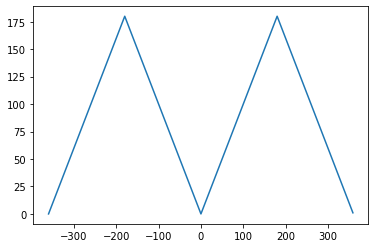

In [62]:
angle_diff = np.arange(-360,360)
y = np.abs((angle_diff + 180) % 360 - 180)
plt.plot(angle_diff,y)

In [22]:
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae2),loss_func=mean_square_sin_error)

Input von cnn_learner:

- dls: Wir benutzen die Daten auf dem Dataloader
- Transfer learning: Wir benutzen eine vortranierte CNN (resnet34,pretrained=True)
- Metrics: Wir werden beobachten ob der mae (mean absolute error) besser wird. 
- loss_func: Wir benutzen unsere eigene Fehlerfunktion, damit die CNN deren gewichte aktualisieren können.

In [77]:
#Andere parametern sind als dafault konfiguriert
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

##  Training: Learning Rate Finder (Fastai)

Es werden kleine Batches benutzt, und mit verschiedenen LRs traniert. Das plotten von den Losses soll die LR-Entscheidung einfacher machen:

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.015848932787775993)

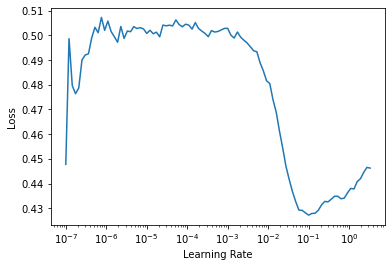

In [25]:
learn.lr_find()

Wir benutzen einen Wert zwischen lr_min und lr_steep

epoch,train_loss,valid_loss,mae2,time
0,0.492859,0.487410,88.530289,00:02
1,0.484844,0.459053,84.200493,00:02
2,0.451839,0.365458,69.280342,00:02
3,0.391335,0.253038,53.393520,00:02
4,0.320975,0.180315,41.914318,00:02


epoch,train_loss,valid_loss,mae2,time
0,0.156888,0.194940,44.117954,00:02
1,0.126593,0.111529,31.897236,00:02
2,0.096256,0.059648,21.610916,00:02
3,0.085127,0.110161,30.823650,00:02
4,0.073946,0.048494,19.245428,00:02
5,0.065009,0.051010,15.957010,00:02
6,0.056333,0.053317,16.992176,00:02
7,0.049582,0.024351,11.283829,00:02
8,0.044465,0.026912,12.097836,00:02
9,0.041443,0.022559,10.688094,00:02


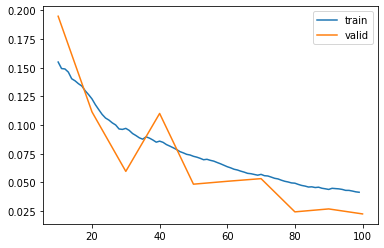

In [26]:
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae2),loss_func=mean_square_sin_error)
lr=1e-2
learn.fine_tune(10,lr,5)
#learn.fit_one_cycle(10,lr)
learn.recorder.plot_loss(skip_start=10)

Sehr gut, mein Netz hat etwas gelernt! 
- Aber ist das gut? 
- Wie kann ich es beurteilen?
- Wie kann ich es testen?


wir können learn.show_results() benutzen

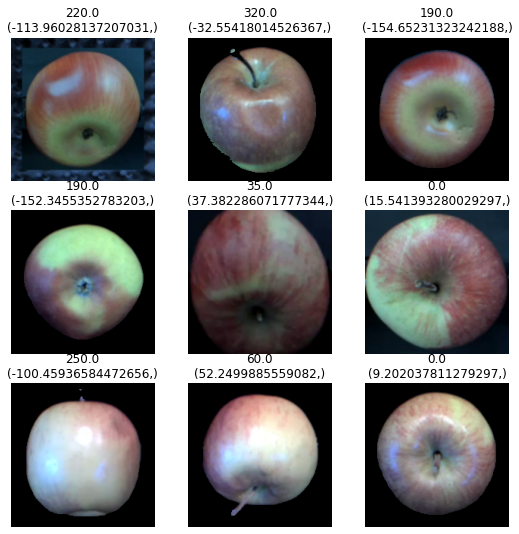

In [27]:
learn.show_results()

In [28]:
preds,target = learn.get_preds(ds_idx=1)
preds=preds%360
preds[0:5],target[0:5]


(tensor([[ 52.7284],
         [242.2183],
         [116.1069],
         [232.8196],
         [233.7241]]),
 tensor([ 40., 230., 120., 220., 215.]))

In [29]:
error=np.asarray(preds).reshape(-1)-np.asarray(target)
error=(error + 180) % 360 - 180
abs_error = np.abs(error)
np.mean(abs_error)

10.688093

In [30]:
top_wrong=np.flip(np.argsort(abs_error)) #sort index from biggest error to smallest error
most_wrong=top_wrong[0]
top_wrong[0:5]

array([ 59, 171, 149,  50,  36])

(tensor(310.), ((44.41655349731445), tensor([44.4166]), tensor([44.4166])))

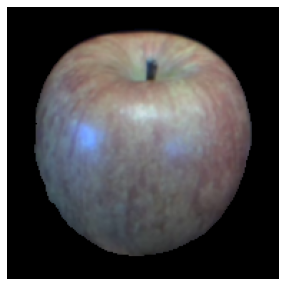

In [31]:
# Image from the validation dataset:
most_wrong=top_wrong[2]
valid_image = dls.valid_ds[most_wrong][0]
valid_image.show()
dls.valid_ds[most_wrong][1],learn.predict(valid_image)

<Figure size 432x288 with 0 Axes>

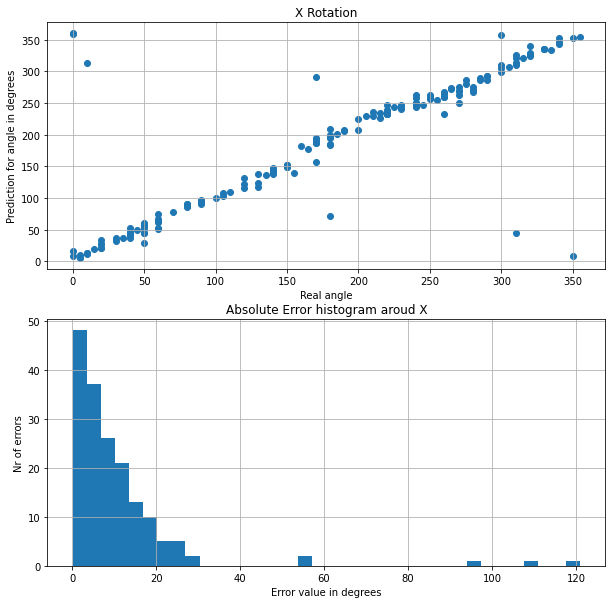

In [32]:
# plot real value vs predicted value
plt.subplots_adjust(wspace=0.6,hspace=0.6);
plt.figure(figsize=(10,10)) ;
plt.subplot(211)
plt.scatter(target, preds);
plt.title('X Rotation')
plt.xlabel('Real angle')
plt.ylabel('Prediction for angle in degrees')
plt.grid()

plt.subplot(212)
plt.hist(abs_error,36);
plt.title('Absolute Error histogram aroud X')
plt.xlabel('Error value in degrees')
plt.ylabel('Nr of errors')
plt.grid();



In [33]:
# Wir machen eine Funktion daraus
def my_interpreter(learn,ds_idx=1):
    preds,target = learn.get_preds(ds_idx=1)
    error=np.asarray(preds).reshape(-1)-np.asarray(target)
    error=(error + 180) % 360 - 180
    abs_error = np.abs(error)
    # plot real value vs predicted value
    plt.subplots_adjust(wspace=0.6,hspace=0.6);
    plt.figure(figsize=(10,10)) ;
    plt.subplot(211)
    plt.scatter(target, preds);
    plt.title('X Rotation')
    plt.xlabel('Real angle')
    plt.ylabel('Prediction for angle in degrees')
    plt.grid()
    # plot error histogram
    plt.subplot(212)
    plt.hist(abs_error,36);
    plt.title('Absolute Error histogram aroud X')
    plt.xlabel('Error value in degrees')
    plt.ylabel('Nr of errors')
    plt.grid()
    print('mean absolute error = ',np.mean(abs_error))
    return np.flip(np.argsort(abs_error))

## Super! Es klappt richtig gut!

jetzt soll man auch mit anderen Bildern testen

In [34]:
#test_path = Path()/'../../Testset'
url_photos = 'https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Test.tgz'
test_path = untar_data(url_photos)
#test_path = Path('/home/ara/Dokumente/CNN_Python/Vorlesung Deep Learning/Datensatz/Apple_20_Test')
test_path.ls()

(#1) [Path('/home/ara/.fastai/data/Apples_Test/Apple_20seg')]

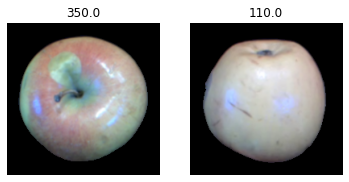

In [35]:
test_dblock_190 = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.9,seed=7),
                   get_items = get_image_files,
                   get_y = simple_get_y,
                   item_tfms = Resize(190), 
                  )




test_dls_190 = test_dblock_190.dataloaders(test_path,bs=2)
test_dls_190.show_batch()

In [36]:
learn.dls = test_dls_190

mean absolute error =  31.3321


<Figure size 432x288 with 0 Axes>

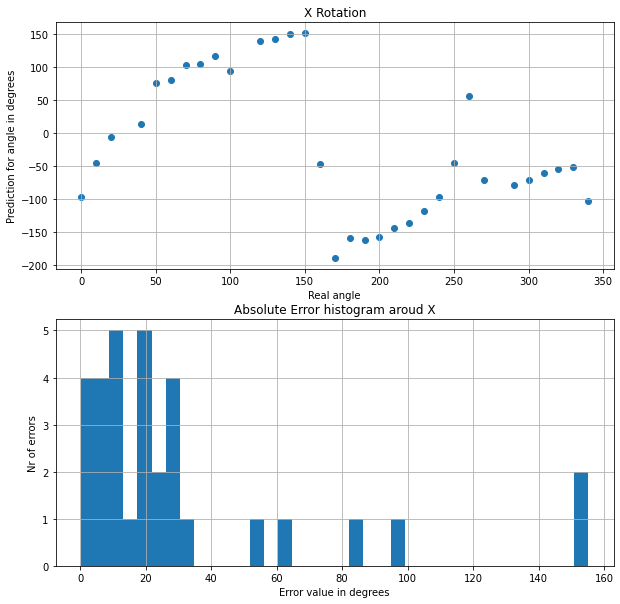

In [37]:
my_interpreter(learn);

## Wir haben ein Problem! Mit test Daten geht es nicht wie erwartet!

## Warum ist die unterschied zwischen Validierungsfehler und Testfehler so groß?

### 1. Poblem: Die Bilder im Validierungs- und Trainings-Set sind praktisch gleich.
Da die Bildern zufällig ausgewählt sind und nur wenige Winkel gedreht sind, sind Äpfel im Validierungs- und Trainings-Set praktisch gleich. Aus diesem Grund scheint es, als ob das Netzwerk perfekt funktioniert, aber in Wirklichkeit hat das Netz genau den Winkel diesen 20 Äpfel zu unterscheiden und nicht andere Äpfel.

### 1. Lösung: Unterschiedliche Äpfel für den Trainings- und Validierungssatz.

Verschiedene Äpfel für das Training und Validierung verwenden, damit die CNN besser verallgemeinen können. z. B. die ersten 15 Äpfel zum Trainieren und die letzten 5 Äpfel zum Validieren verwenden.



In [38]:
path_apples.ls()
train=[Path(x).name for x in path_apples.ls() if Path(x).name[7]!='7']
val=[Path(x).name for x in path_apples.ls() if Path(x).name[7]=='7']
val

['Apple_17seg', 'Apple_07seg']

In [39]:
dblock2 = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = FuncSplitter(lambda o: Path(o).parent.name[7]=='7'),
                   get_items = get_image_files,
                   get_y = simple_get_y,
                   item_tfms = Resize(190),
                  )

dls2 = dblock2.dataloaders(path_apples)

In [40]:
dls2.valid_ds, dls2.train_ds

((#72) [(PILImage mode=RGB size=190x190, tensor(220.)),(PILImage mode=RGB size=190x190, tensor(130.)),(PILImage mode=RGB size=190x190, tensor(350.)),(PILImage mode=RGB size=190x190, tensor(290.)),(PILImage mode=RGB size=190x190, tensor(50.)),(PILImage mode=RGB size=190x190, tensor(70.)),(PILImage mode=RGB size=190x190, tensor(120.)),(PILImage mode=RGB size=190x190, tensor(340.)),(PILImage mode=RGB size=190x190, tensor(190.)),(PILImage mode=RGB size=190x190, tensor(280.))...],
 (#792) [(PILImage mode=RGB size=190x190, tensor(220.)),(PILImage mode=RGB size=190x190, tensor(130.)),(PILImage mode=RGB size=190x190, tensor(350.)),(PILImage mode=RGB size=190x190, tensor(290.)),(PILImage mode=RGB size=190x190, tensor(50.)),(PILImage mode=RGB size=190x190, tensor(70.)),(PILImage mode=RGB size=190x190, tensor(120.)),(PILImage mode=RGB size=190x190, tensor(340.)),(PILImage mode=RGB size=190x190, tensor(190.)),(PILImage mode=RGB size=190x190, tensor(280.))...])

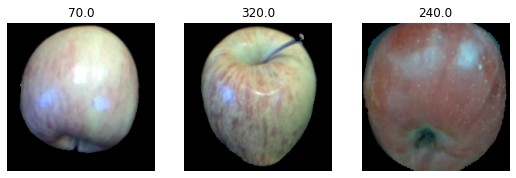

In [41]:
dls2.show_batch(max_n=3)

In [42]:
learn2 = cnn_learner(dls2,resnet34,pretrained=True,metrics=(mae2),loss_func=mean_square_sin_error)

SuggestedLRs(lr_min=0.09120108485221863, lr_steep=6.309573450380412e-07)

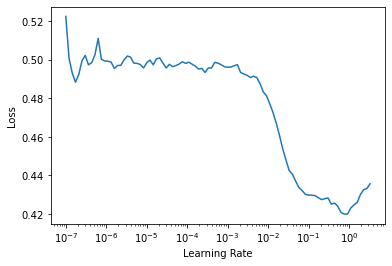

In [43]:
learn2.lr_find()

epoch,train_loss,valid_loss,mae2,time
0,0.480730,0.413693,78.353661,00:02
1,0.354478,0.407587,75.180786,00:02
2,0.246320,0.453285,84.552147,00:02
3,0.179505,0.168578,38.736958,00:02
4,0.135610,0.107910,29.109985,00:02


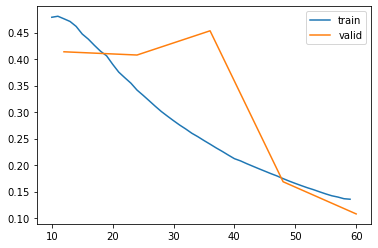

In [44]:
lr = 1e-2
learn2.fit_one_cycle(5,lr)
learn2.recorder.plot_loss(skip_start=10)

unsere Netze können nicht mehr so einfach lernen! 
Das ist aber gut, die Bilder können nicht mehr auswendig gelernt werden!

### Fine-Tunning ohne fine_tune()

mit der .fit und .fit_one_cycle waren fast alle die gewichte von unsere CNN gefroren, bzw. konnten nicht aktualisiert werden. Nur die Parametern in dem letzten Layer wurden angepasst.

Mit fine-tuning können auch die letze Layers traniert werden. 

In [45]:
learn2.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.3182567499825382e-06)

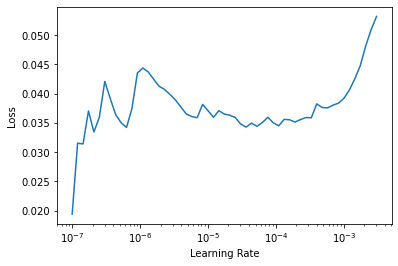

In [46]:
learn2.lr_find()

In [47]:
 learn2.fit_one_cycle(5,lr_max=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,mae2,time
0,0.032575,0.081542,23.815454,00:02
1,0.033723,0.114906,30.547421,00:02
2,0.033001,0.144656,32.999275,00:02
3,0.030180,0.117846,27.935011,00:02
4,0.028102,0.114182,27.709494,00:02


In [48]:
#learn2.save('rnet34_190px')
#learn2.load('rnet34_90px')

mean absolute error =  27.709494


array([53, 47, 60, 70,  2,  7,  4, 40, 64, 31, 23, 44, 52, 66, 13, 25, 50,
       49,  8, 38, 16, 65, 71, 21, 27, 15, 43,  9, 29, 18, 28, 45, 32, 63,
       67, 39, 26, 48, 11, 46,  0, 34,  3, 56,  6, 57,  1, 42, 22, 51, 12,
       54, 19, 69, 10, 36, 62, 55, 37, 24, 20, 59, 68, 33, 58,  5, 35, 61,
       14, 30, 41, 17])

<Figure size 432x288 with 0 Axes>

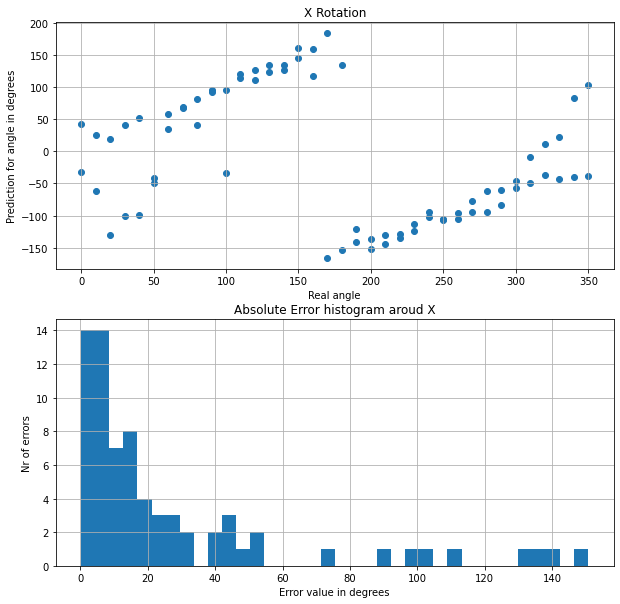

In [49]:
my_interpreter(learn2)

da die Daten nicht mehr fast gleich sind, können diese netze nicht besser werden

### Jetzt testen wir nochmal

In [50]:
learn2.dls = test_dls_190

mean absolute error =  34.296055


<Figure size 432x288 with 0 Axes>

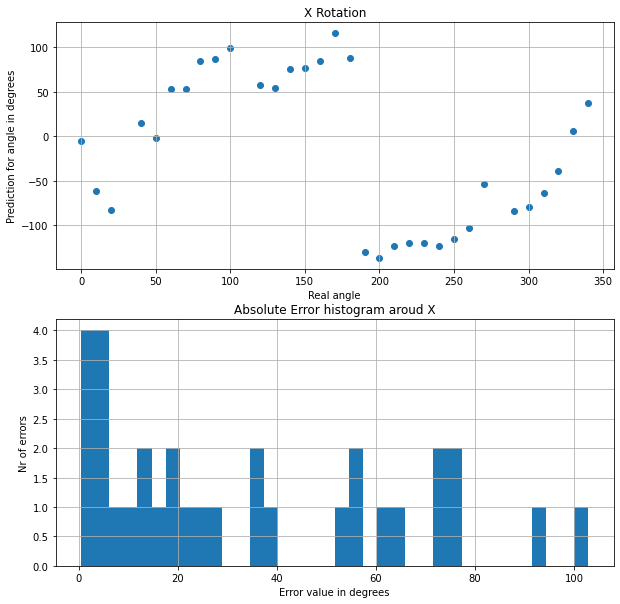

In [51]:
my_interpreter(learn2);

Das ist besser, aber der Fehler ist noch zu groß!


## Wie kann ich besser werden?
### Problem: Die Erkennung ist nicht robust
### Lösung: Data-Augmentation
Data augmentation mit fastai: https://docs.fast.ai/vision.augment.html. 
Hier werden einfach standardmäßige Augmentations verwendet.

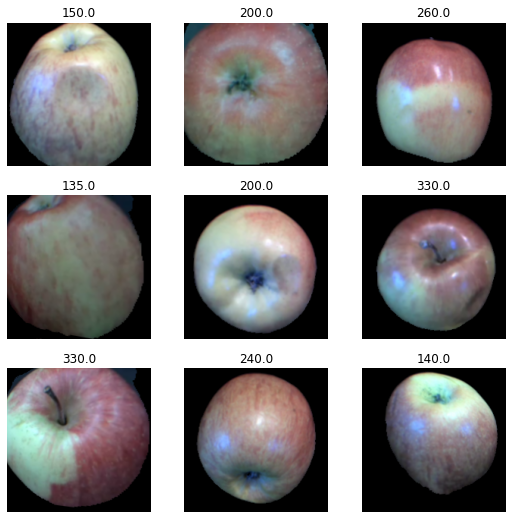

In [52]:
dblock2_big_aug= DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  =FuncSplitter(lambda o: Path(o).parent.name[7]=='7'),
                   get_items = get_image_files,
                   get_y = simple_get_y, 
                   item_tfms = Resize(190),
                   batch_tfms=[*aug_transforms(size=190,do_flip=False,flip_vert=False,max_rotate=0)]
                  )

dls2_big_aug = dblock2_big_aug.dataloaders(path_apples)


dls2_big_aug.show_batch()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.5848931980144698e-06)

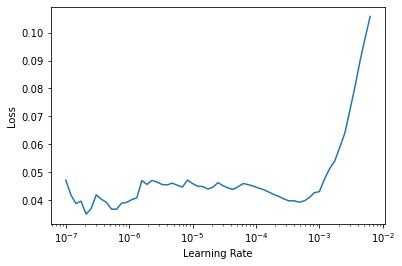

In [53]:
learn2.dls = dls2_big_aug
learn2.lr_find()

epoch,train_loss,valid_loss,mae2,time
0,0.033604,0.244799,50.558350,00:02


epoch,train_loss,valid_loss,mae2,time
0,0.031557,0.135634,33.178974,00:02
1,0.034102,0.107452,27.239185,00:02
2,0.037548,0.105603,26.179205,00:02


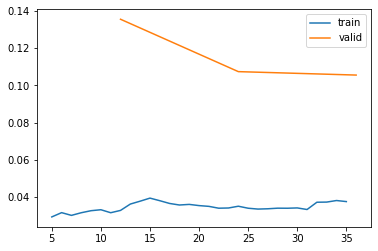

In [54]:
lr=1e-4
learn2.fine_tune(3,lr,1)
learn2.recorder.plot_loss()

mean absolute error =  26.179203


<Figure size 432x288 with 0 Axes>

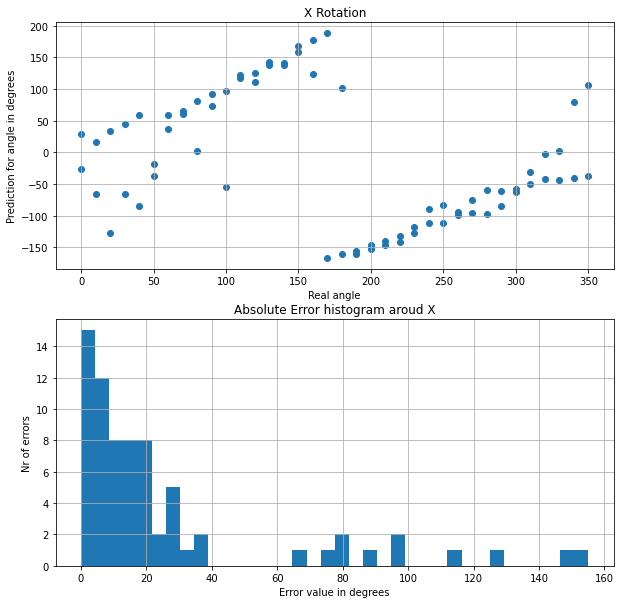

In [55]:
my_interpreter(learn2);

### Jetzt testen wir nochmal

In [56]:
learn2.dls = test_dls_190

mean absolute error =  21.81386


<Figure size 432x288 with 0 Axes>

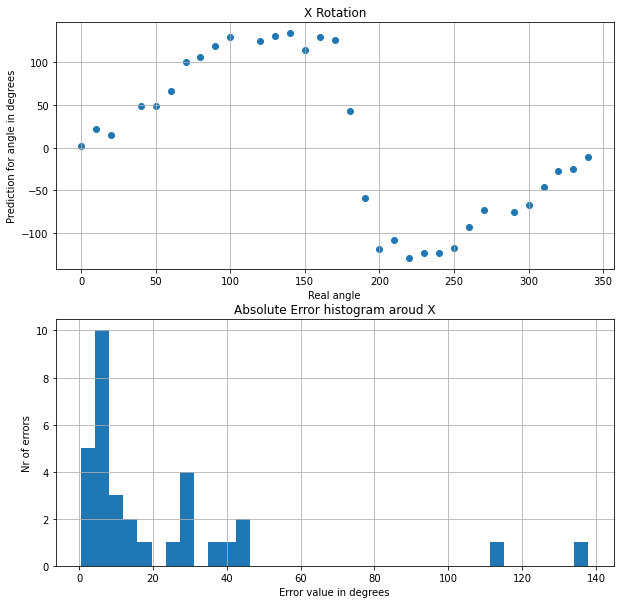

In [57]:
my_interpreter(learn2);

es ist nicht perfekt, aber es ist viel besser geworden!

## Weitere mögliche Verbesserungen:
- Mehr Daten: echte Daten Verwenden aus unterschiedliche Äpfelsorten.
- Weitere state-of-the-art Netze testen
- Neue Optimizers, neue nicht liniare Funktionen (z.B. Mish anstatt Relu), und weitere coole sachen!

In [58]:
learn3 = cnn_learner(dls2_big_aug,??,pretrained=True,metrics=(mae2),
                     loss_func=mean_square_sin_error,opt_func=??,wd=??)
learn3.lr_find()

SyntaxError: invalid syntax (<ipython-input-58-f50783e179bf>, line 1)